In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations, cluster_correlations
import matplotlib.gridspec as gridspec

In [81]:
# Function hub
def plot_univariate_analysis(df, features, plot_type, plot):
    """
    Plot boxplot, barplot or histogram for univariate analysis.
    :param df: df, input dataframe
    :param features: list, features to plot
    :param plot_type: str, plot type
    :param plot: plot
    :return: -
    """
    cnt = 0

    for ftr in features:
        if plot_type == 'box':
            sns.boxplot(x=ftr, data=df, ax=axes[cnt])
        elif plot_type == 'bar':
            freq = df[ftr].value_counts()
            sns.barplot(x=freq.index, y=freq.values, ax=axes[cnt])
        elif plot_type == 'hist':
            sns.histplot(data=df, x=ftr, bins=30, ax=axes[cnt])
        cnt = cnt + 1
    plot.tight_layout()

## Data Acquisition

##### Data Set Information

The original dataset "german.data" is in the form provided by Prof. Hofmann and contains categorical/symbolic attributes.

The last column represents the class attribute - the goodness of the customer (1 = Good, 2 = Bad).

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).


Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no


## Pre-processing

In [82]:
# Transform the german.data file into the CSV file format, i.e. german_processed.csv.

# For errorless reading of data from the web
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Read in data
df_german = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep=' ', header = None)

In [83]:
# Add a header row with the attribute names.

df_german.columns = ['checking_account', 'duration_in_month', 'credit_history', 'purpose', 'credit_amount', 'savings_account','employment_since', 'installment_rate', 'status_and_sex', 'co-applicants_guarantors', 'residence_since', 'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_to_provide_maintenance_for', 'telephone', 'foreign_worker', 'customer_goodness']

# Full names
"""df_german.columns = ['Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose', 'Credit_amount', 'Savings_account/bonds','Present_employment_since', 'Installment_rate_in_percentage_of_disposable_income', 'Personal_status_and_sex', 'Other_debtors/guarantors', 'Present_residence_since', 'Property', 'Age_in_years', 'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank', 'Job', 'People_being_liable_to_provide_maintenance_for', 'Telephone', 'Foreign_worker', 'Customer_goodness']"""

df_german.head()

,checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,status_and_sex,co-applicants_guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,people_to_provide_maintenance_for,telephone,foreign_worker,customer_goodness
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [84]:
# Convert all categorical data points into something more human-understandable, e.g. A42 -> furniture/equipment.

df_german = df_german.replace({
                              "A11": "negative",
                              "A12": "0_to_200",
                              "A13": "over_200",
                              "A14": "none",

                              "A30": "none_or_duly_paid",
                              "A31": "duly_paid",
                              "A32": "existing_duly_paid",
                              "A33": "delayed",
                              "A34": "critical_account",

                              "A40": "car_new",
                              "A41": "car:used",
                              "A42": "furniture",
                              "A43": "radio_tv",
                              "A44": "appliances",
                              "A45": "repairs",
                              "A46": "education",
                              "A47": "vacation",
                              "A48": "retraining",
                              "A49": "business",
                              "A410": "other",

                              "A61": "up_to_100",
                              "A62": "100_to_500",
                              "A63": "500_to_1000",
                              "A64": "over_1000",
                              "A65": "unknown",

                              "A71": "unemployed",
                              "A72": "up_to_1y",
                              "A73": "1_to_4y",
                              "A74": "4_to_7y",
                              "A75": "over_7y",

                              "A91": "male_separated",
                              "A92": "female_married_separated",
                              "A93": "male_single",
                              "A94": "male_married",
                              "A95": "female_single",

                              "A101": "none",
                              "A102": "co-applicant",
                              "A103": "guarantor",

                              "A121": "real_estate",
                              "A122": "building_society_savings_agreement_or_life_insurance", #???
                              "A123": "car_other",
                              "A124": "none_unknown",

                              "A141": "bank",
                              "A142": "stores",
                              "A143": "none",

                              "A151": "rent",
                              "A152": "own",
                              "A153": "free",

                              "A171": "unemployed_non-resident",
                              "A172": "unskilled_resident",
                              "A173": "employed",
                              "A174": "highly_qualified_or_self-employed",

                              "A191": "no",
                              "A192": "yes",

                              "A201": "yes",
                              "A202": "no",
                               })

df_german = df_german.replace({"customer_goodness": 2}, 0) # 1 = "yes", 0 = "no"

In [85]:
df_german

,checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,status_and_sex,co-applicants_guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,people_to_provide_maintenance_for,telephone,foreign_worker,customer_goodness
0,negative,6,critical_account,radio_tv,1169,unknown,over_7y,4,male_single,none,...,real_estate,67,none,own,2,employed,1,yes,yes,1
1,0_to_200,48,existing_duly_paid,radio_tv,5951,up_to_100,1_to_4y,2,female_married_separated,none,...,real_estate,22,none,own,1,employed,1,no,yes,0
2,none,12,critical_account,education,2096,up_to_100,4_to_7y,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no,yes,1
3,negative,42,existing_duly_paid,furniture,7882,up_to_100,4_to_7y,2,male_single,guarantor,...,building_society_savings_agreement_or_life_ins...,45,none,free,1,employed,2,no,yes,1
4,negative,24,delayed,car_new,4870,up_to_100,1_to_4y,3,male_single,none,...,none_unknown,53,none,free,2,employed,2,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,none,12,existing_duly_paid,furniture,1736,up_to_100,4_to_7y,3,female_married_separated,none,...,real_estate,31,none,own,1,unskilled_resident,1,no,yes,1
996,negative,30,existing_duly_paid,car:used,3857,up_to_100,1_to_4y,4,male_separated,none,...,building_society_savings_agreement_or_life_ins...,40,none,own,1,highly_qualified_or_self-employed,1,yes,yes,1
997,none,12,existing_duly_paid,radio_tv,804,up_to_100,over_7y,4,male_single,none,...,car_other,38,none,own,1,employed,1,no,yes,1
998,negative,45,existing_duly_paid,radio_tv,1845,up_to_100,1_to_4y,4,male_single,none,...,none_unknown,23,none,free,1,employed,1,yes,yes,0


In [86]:
# Submit the final processed CSV file to your group folder (hcds-summer-2022/assignments/A2_GCD_explo/GROUP).

#df_german.to_csv('../assignments/A2_GCD_explo/Group_2/df_german.csv')

 ## Data Analysis

What can you say about the features?
What are the proportions of applicants belonging to a certain feature?
How is the distribution of a feature?
Who is considered to have a good or bad credit risk?

##### Univariate exploratory analysis

In [87]:
# Split features into categorical and numerical
dtype = df_german.dtypes
num_features = dtype[dtype == 'int64'].index
cat_features = dtype[dtype == 'object'].index

In [88]:
# Univariate statistics for numerical features
df_german[num_features].describe()

,duration_in_month,credit_amount,installment_rate,residence_since,age,existing_credits,people_to_provide_maintenance_for,customer_goodness
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


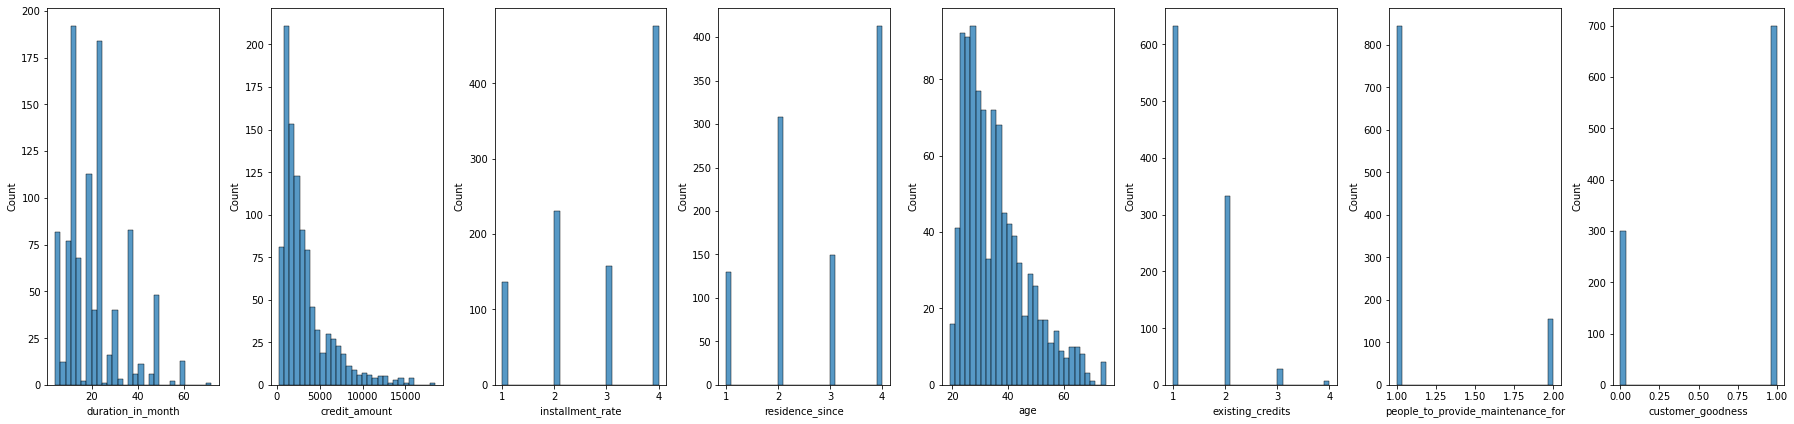

In [89]:
# Plot numerical features as histograms
plot_hist, axes = plt.subplots(1, len(num_features))
plot_hist.set_size_inches(25, 6)
plot_univariate_analysis(df_german, num_features, 'hist', plot_hist)

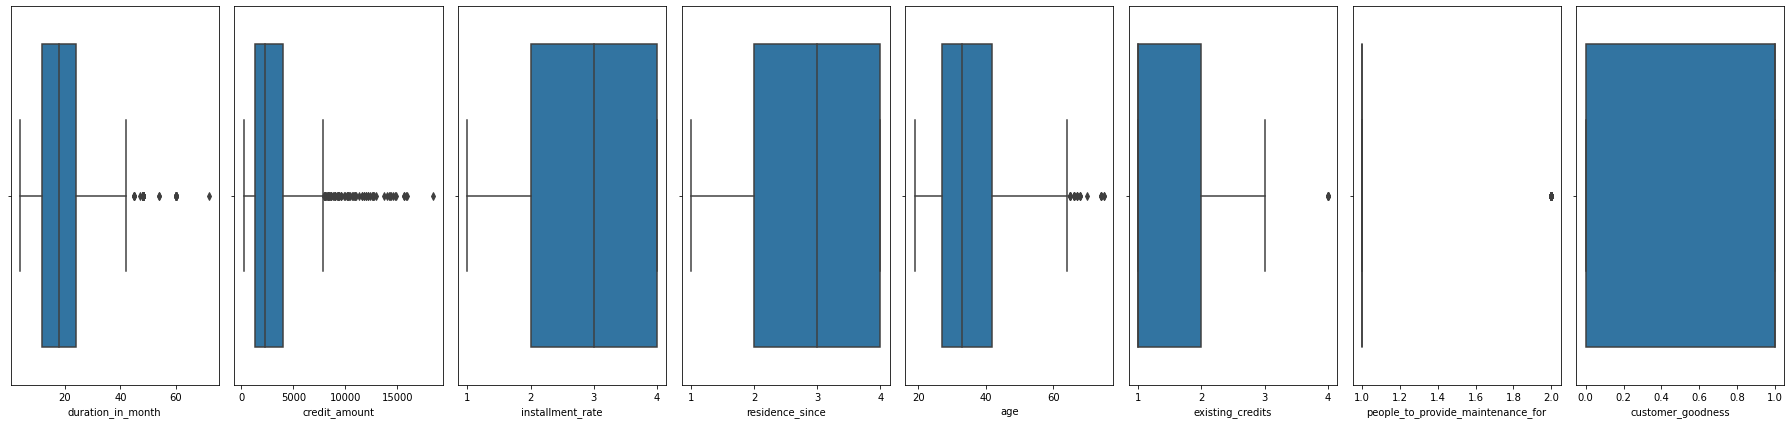

In [90]:
# Plot numerical features as boxplots
plot_num, axes = plt.subplots(1, len(num_features))
plot_num.set_size_inches(25, 6)
plot_univariate_analysis(df_german, num_features, 'box', plot_num)

In [91]:
# Mode: univariate statistic for categorical features
pd.DataFrame(data=df_german, columns=cat_features).mode()

,checking_account,credit_history,purpose,savings_account,employment_since,status_and_sex,co-applicants_guarantors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,none,existing_duly_paid,radio_tv,up_to_100,1_to_4y,male_single,none,car_other,none,own,employed,no,yes


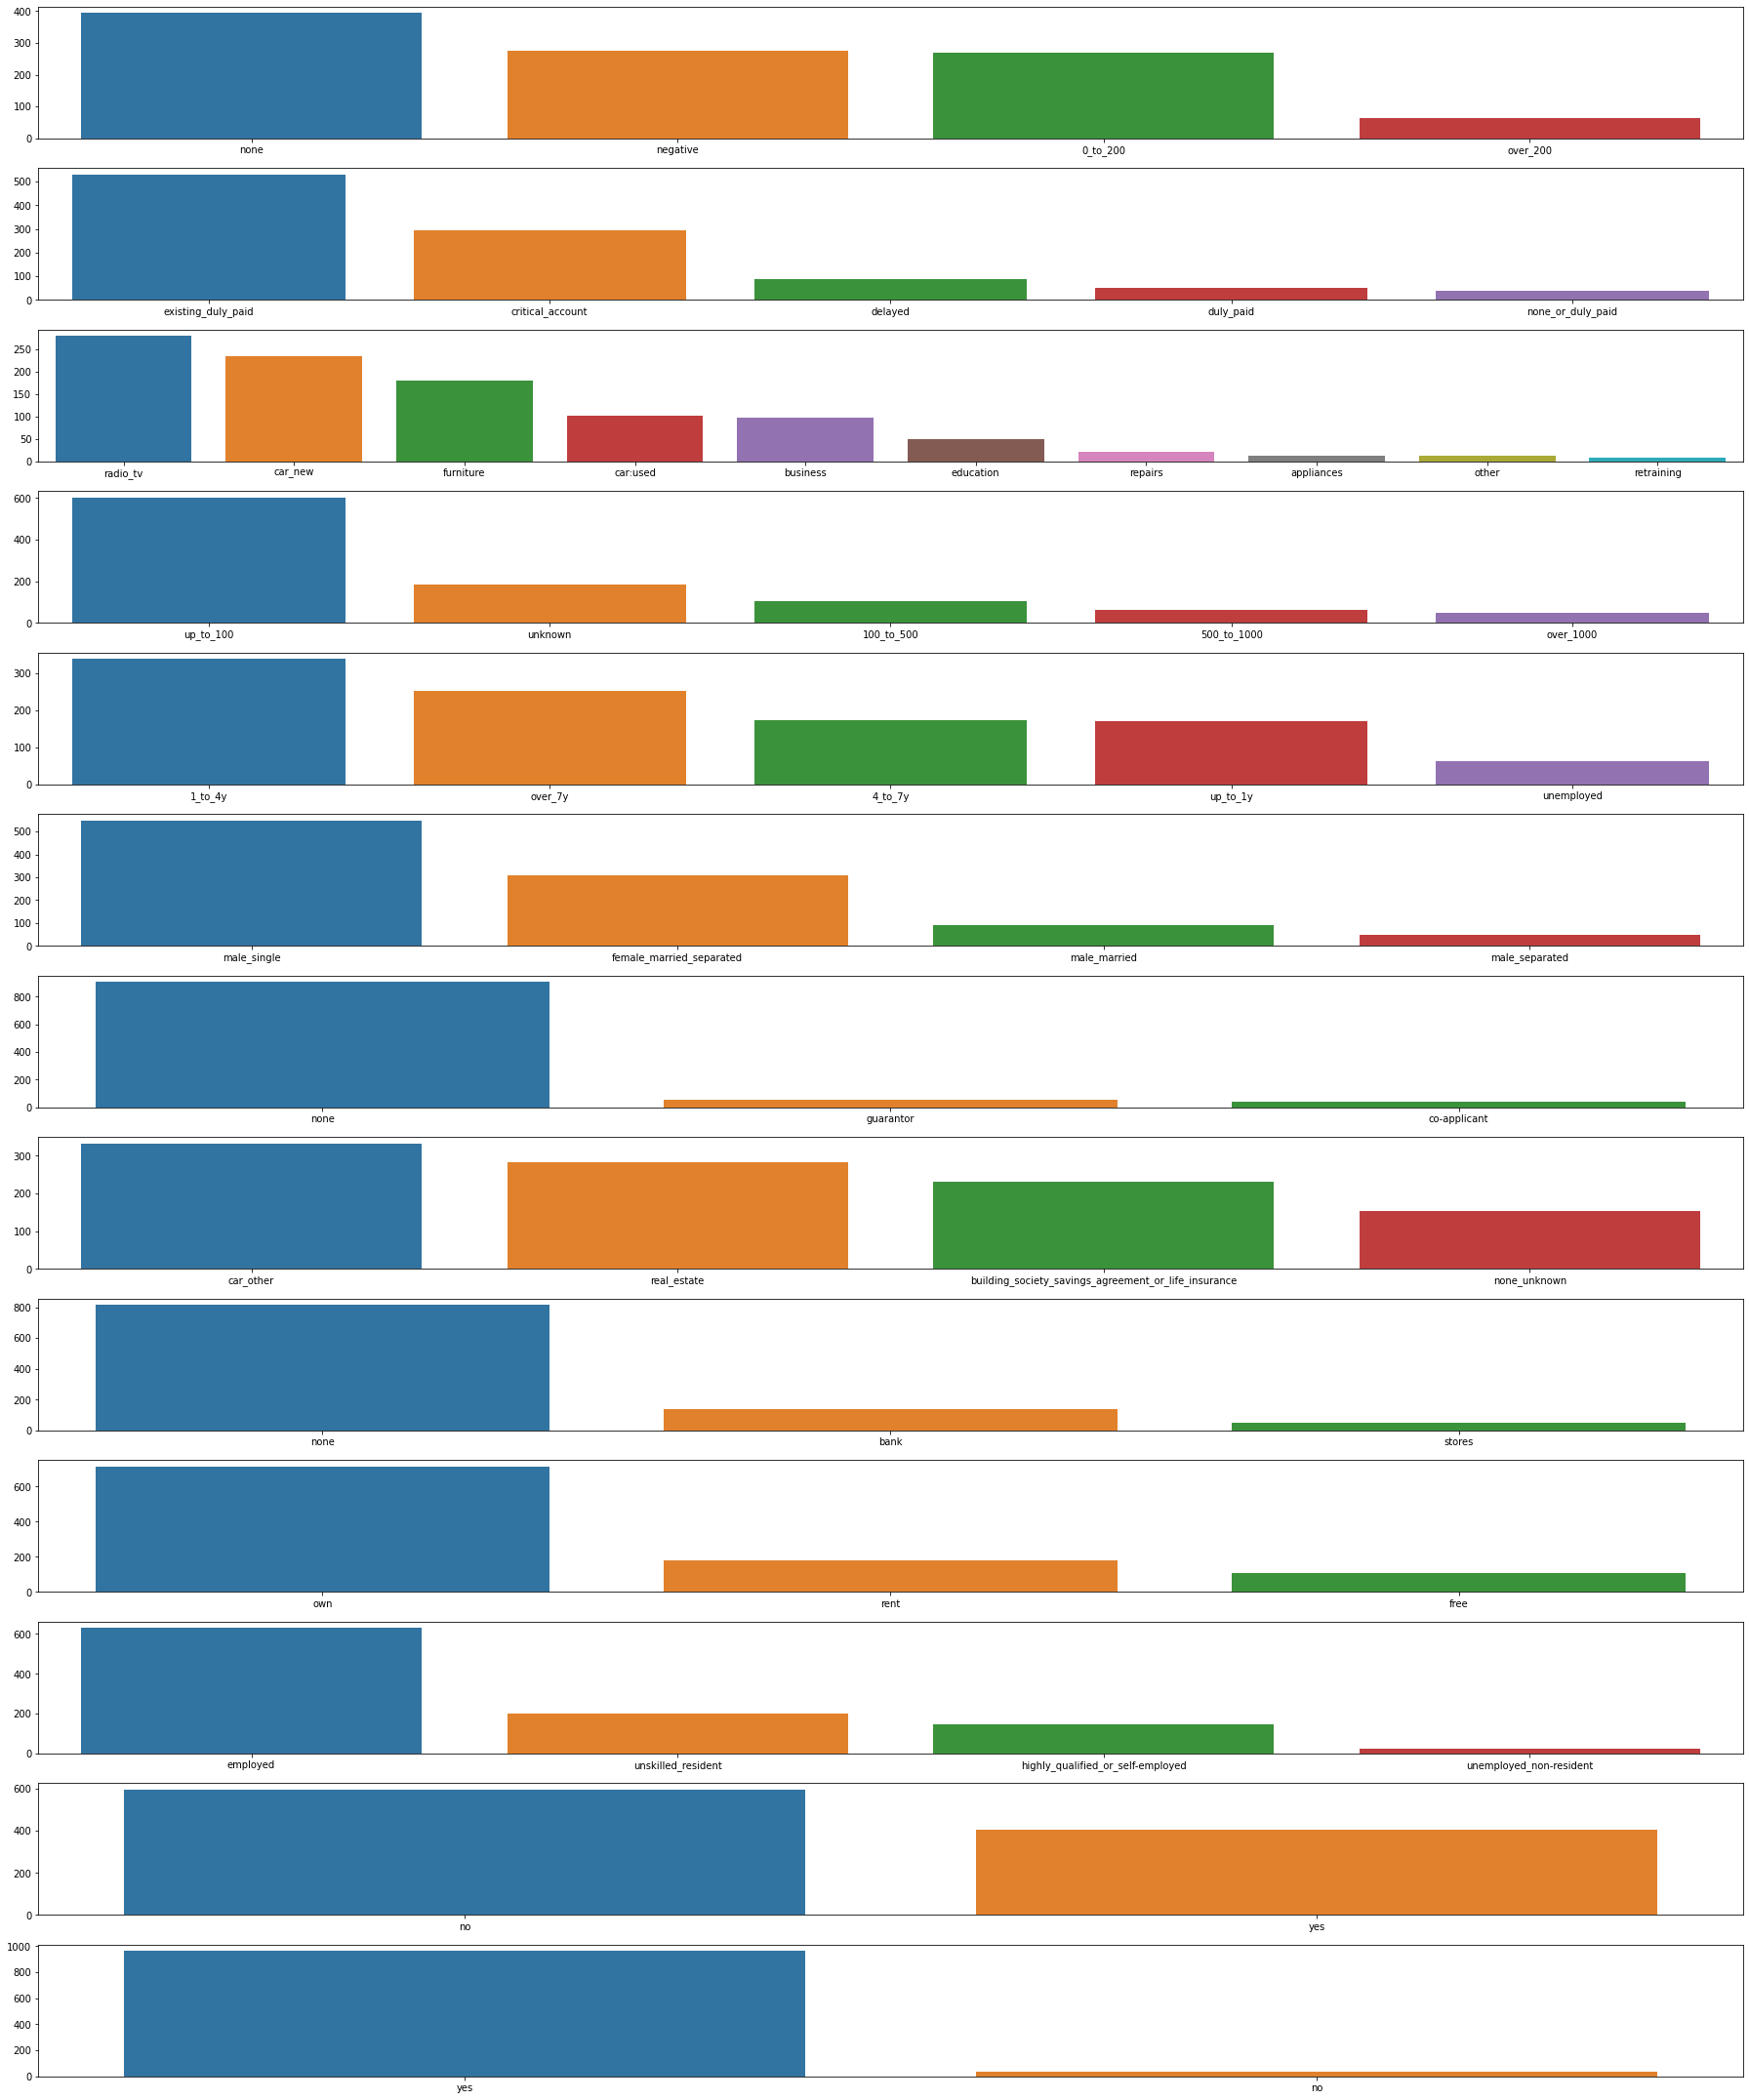

In [92]:
# Plot categorical features as barplots
plot_cat, axes = plt.subplots(len(cat_features), 1)
plot_cat.set_size_inches(25, 30)
plot_univariate_analysis(df_german, cat_features, 'bar', plot_cat)

#### Bivariate exploratory analysis

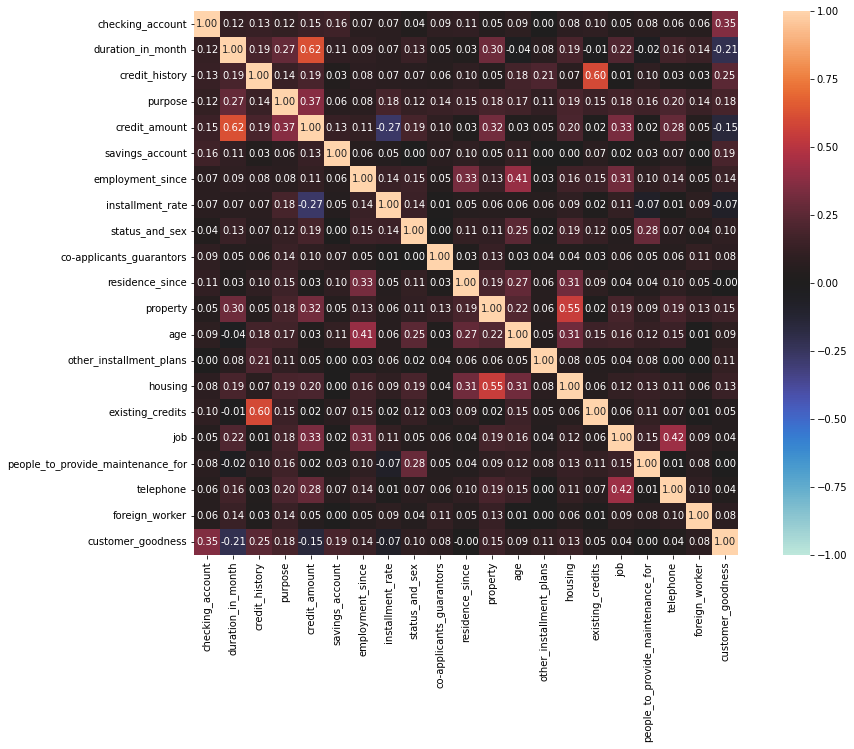

In [93]:
# Calculate the correlation/strength-of-association for both categorical and continuous features in the ds:

# * Pearson's R for continuous-continuous cases
# * Correlation Ratio for categorical-continuous cases
# * Cramer's V or Theil's U for categorical-categorical cases
assoc_matrix = associations(dataset = df_german, nom_nom_assoc = "cramer", figsize = (16,10))

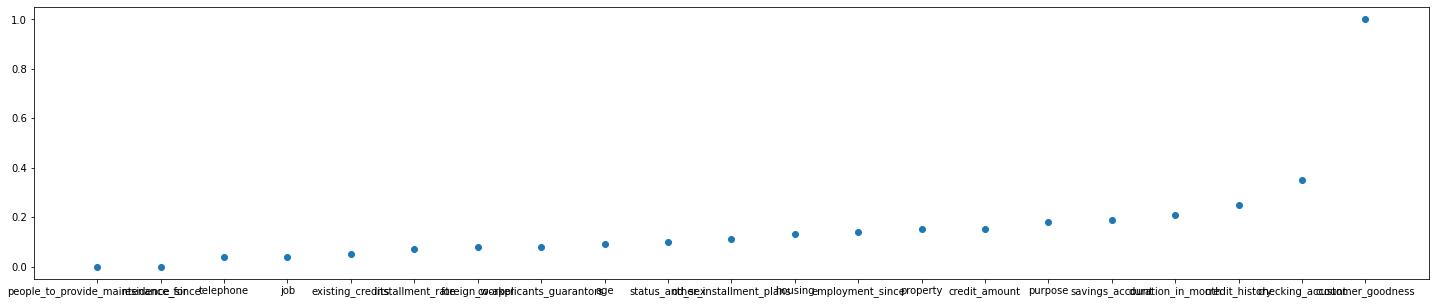

In [102]:
# Absolute ssociations of features with the class attribute in ascending order

associations, _ = cluster_correlations(assoc_matrix["corr"])
corr = abs (round(associations["customer_goodness"], 2) ).sort_values()
plt.figure(figsize=(25, 5))
plt.scatter(x = corr.index, y = corr.values)

In [101]:
# Association values
corr

people_to_provide_maintenance_for    0.00
residence_since                      0.00
telephone                            0.04
job                                  0.04
existing_credits                     0.05
installment_rate                     0.07
foreign_worker                       0.08
co-applicants_guarantors             0.08
age                                  0.09
status_and_sex                       0.10
other_installment_plans              0.11
housing                              0.13
employment_since                     0.14
property                             0.15
credit_amount                        0.15
purpose                              0.18
savings_account                      0.19
duration_in_month                    0.21
credit_history                       0.25
checking_account                     0.35
customer_goodness                    1.00
Name: customer_goodness, dtype: float64

##### Further preprocessing steps depend on the application in mind...